In [1]:
import numpy as np

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты линейной регрессии:

In [3]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

Итак, модель линейной регрессии имеет вид:

𝑦=444.18+2.62⋅𝑥,
 
Визуализируем полученные результаты на графике.

In [5]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'scoring')

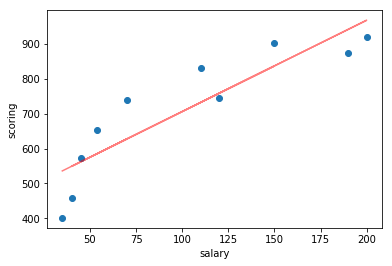

In [13]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')

воспользуемся методом наименьших квадратов

In [8]:
salary.shape

(10,)

In [46]:
s=salary.reshape((-1,1))


К матрице  𝑋  (массив s) нужно добавить столбец из  1 , соответствующий фиктивному фактору.

In [47]:
ones = np.ones((salary.shape[0],1))
salary1 = np.hstack((ones, s))
salary1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [67]:
sc1=scoring.reshape((-1,1))
sc1

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

Запишем матрицу  𝑋⊤𝑋  и посчитаем её определитель.

In [48]:
XTX = salary1.T.dot(salary1)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [51]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary1.T).dot(sc1)

print(b)

[[444.17735732]
 [  2.62053888]]


Итак, модель линейной регрессии имеет вид:

𝑦=444.18+2.62⋅𝑥,

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [17]:
scoring1 = b0 + b1 * salary

print(f'real: {scoring}')
print(f'pred: {scoring1}')

real: [401 574 874 919 459 739 653 902 746 832]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


коэффициент детерминации:

In [18]:
R1 = scoring1.var() / scoring.var()
R1

0.7876386635293678

Коэффициент детерминации, равный  0.7876 , означает, что  78,76%  дисперсии переменной  𝑦  учитывается или объясняется моделью. Оставшиеся  21,24%  обусловлены какими-то ещё факторами, которые модель не учла.

Посчитаем среднюю ошибку аппроксимации

In [19]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [20]:
mean_approximation_error(scoring, scoring1)

0.11469251843561709

Средняя ошибка аппроксимации равна 0.1147

#### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

имеем  𝑘1=1 ,  𝑘2=10−1-1=8 . Посчитаем значение статистики  𝑇 :

In [52]:
k1 = 1
k2 = 8

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

Для уровня значимости 𝛼=0.05 посчитаем значение 𝐹𝑐𝑟𝑖𝑡=𝐹(1,8). 

In [53]:
from scipy import stats

In [54]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем  𝑇>𝐹𝑐𝑟𝑖𝑡 , поэтому уравнение регрессии статистически значимо.

### Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [55]:
b0,b1

(444.1773573243596, 2.620538882402765)

Проверим значимость коэффициента наклона, а также построим для него доверительный интервал.

In [56]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [57]:
s_slope = standard_error_slope(salary, scoring, scoring1)
s_slope

0.48108279568516005

Зададим уровень значимости  𝛼=0.05 . В нашем случае  𝑛=10 , поэтому нас интересует квантиль  $t_{1 - 0.05/2, \: 8}$

In [58]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Гипотеза в нашем случае заключается в том, что коэффициент  𝑏1=0 . Значение статистики  𝑇 :

In [59]:
T = b1 / s_slope
T

5.447168150485579

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  𝑏1  отвергается.

Доверительный интервал для параметра  𝑏1 :

In [60]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

для параметра  𝑏0 :

In [61]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [62]:
s_intercept = standard_error_intercept(salary, scoring, scoring1)
s_intercept

56.46649755068153

Значение статистики  𝑇 :

In [63]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  𝑏1  отвергается.

Доверительный интервал для параметра  𝑏0 :

In [64]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

### Задача2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба

In [77]:
sc = scoring.reshape((-1,1))
sc

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [78]:
ss = np.hstack((s,sc))
ss

array([[ 35, 401],
       [ 45, 574],
       [190, 874],
       [200, 919],
       [ 40, 459],
       [ 70, 739],
       [ 54, 653],
       [150, 902],
       [120, 746],
       [110, 832]])

In [79]:
ss.mean()

405.65

In [80]:
ss.var()

109549.82749999998

In [88]:
np.corrcoef(salary,scoring)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])